In [2]:
import pandas as pd
import numpy as np

In [44]:
data = pd.read_csv("Covid Data.csv")

data.loc[stroke_data['DATE_DIED']=='9999-99-99', ['DATE_DIED']] = '2'
data.loc[stroke_data['DATE_DIED']!='9999-99-99', ['DATE_DIED']] = '1'
data.loc[stroke_data['CLASIFFICATION_FINAL'] >= 4, ['CLASIFFICATION_FINAL']] = '2'
data.loc[stroke_data['CLASIFFICATION_FINAL'] < 4, ['CLASIFFICATION_FINAL']] = '1'
data = data.rename(columns = {'DATE_DIED':'DIED'})
data = data.rename(columns = {'SEX':'MALE'})

data = data.drop(columns = ['USMER', 'MEDICAL_UNIT', 'INTUBED', 'OTHER_DISEASE', 'ICU', 'PREGNANT'])

data

,MALE,PATIENT_TYPE,DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,1,1,1,1,65,2,2,2,2,1,2,2,2,2,1
1,2,1,1,1,72,2,2,2,2,1,2,1,1,2,2
2,2,2,1,2,55,1,2,2,2,2,2,2,2,2,1
3,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2
4,2,1,1,2,68,1,2,2,2,1,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,1,2,2,40,2,2,2,2,2,2,2,2,2,2
1048571,2,2,2,2,51,2,2,2,2,1,2,2,2,2,2
1048572,2,1,2,2,55,2,2,2,2,2,2,2,2,2,2
1048573,2,1,2,2,28,2,2,2,2,2,2,2,2,2,2


In [50]:
data.corr()

,MALE,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
MALE,1.000000,0.089505,-0.012131,0.028367,0.008888,0.009372,0.010415,0.007999,0.009257,0.008174,0.009858,0.008249,0.004919
PATIENT_TYPE,0.089505,1.000000,0.022966,0.315193,0.008743,0.019548,0.023042,0.024924,0.006852,0.022175,0.019650,0.018873,0.022123
PNEUMONIA,-0.012131,0.022966,1.000000,-0.073127,-0.004484,-0.005618,-0.005392,-0.000802,-0.004799,-0.004758,-0.004276,-0.005287,-0.004325
AGE,0.028367,0.315193,-0.073127,1.000000,0.004422,0.019048,0.022715,0.022820,-0.004964,0.019489,0.015500,0.020124,0.021263
DIABETES,0.008888,0.008743,-0.004484,0.004422,1.000000,0.828823,0.829349,0.781108,0.835018,0.809417,0.752739,0.812657,0.771763
COPD,0.009372,0.019548,-0.005618,0.019048,0.828823,1.000000,0.908929,0.852273,0.855249,0.880097,0.814868,0.884032,0.836097
ASTHMA,0.010415,0.023042,-0.005392,0.022715,0.829349,0.908929,1.000000,0.868917,0.864264,0.891026,0.824631,0.895050,0.845067
INMSUPR,0.007999,0.024924,-0.000802,0.022820,0.781108,0.852273,0.868917,1.000000,0.825158,0.853365,0.783953,0.852755,0.806749
HIPERTENSION,0.009257,0.006852,-0.004799,-0.004964,0.835018,0.855249,0.864264,0.825158,1.000000,0.861063,0.805127,0.860477,0.816539
CARDIOVASCULAR,0.008174,0.022175,-0.004758,0.019489,0.809417,0.880097,0.891026,0.853365,0.861063,1.000000,0.834389,0.913248,0.858102


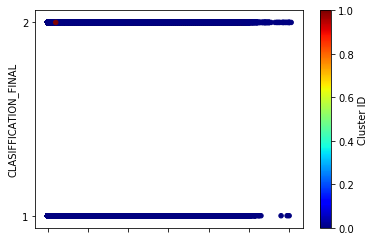

In [48]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=2, max_iter=500, random_state=1)
k_means.fit(data)

labels = pd.DataFrame(k_means.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='AGE',y='CLASIFFICATION_FINAL',c='Cluster ID', colormap='jet')

In [49]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,MALE,PATIENT_TYPE,DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,1.499031,1.190302,1.927076,3.350375,41.774820,1.944283,2.011410,1.991123,2.043009,1.881387,2.007700,1.890997,2.004698,1.967447,1.626389
1,1.583187,1.360886,1.759761,2.043264,48.886739,91.245164,93.907844,94.752374,96.139289,93.203658,95.730215,88.262399,95.126627,93.025677,1.549068
